# **BLOOM**

BigScience Large Open-science Open-access Multilingual Language Model (BLOOM for short), represents a considerable advance in democratizing language model technology.

Developed collaboratively by over 1200 participants from 39 countries, including a significant number from the United States, BLOOM is the product of a global effort. Coordinated by BigScience in collaboration with Hugging Face and the French NLP community, this project transcends geographical and institutional boundaries.

It is an open-source and a decoder-only transformer model with 176B-parameter trained on the ROOTS corpus, which is a dataset of over hundreds of sources in 59 languages: 46 spoken languages and 13 programming languages.





# **Bloom** Architecture
BLOOM is a causal model language, which means that it was trained as a next-token predictor.  This enables BLOOM  to connect multiple concepts in a sentence and manage to solve non-trivial problems such as arithmetic, translation, and programming with fair accuracy. BLOOM uses a Transformer architecture composed of an input embeddings layer, 70 Transformer blocks, and an output language-modeling layer, as shown in the figure below. Each Transformer block has a self-attention layer and a multi-layer perceptron layer, with input and post-attention layer norms.


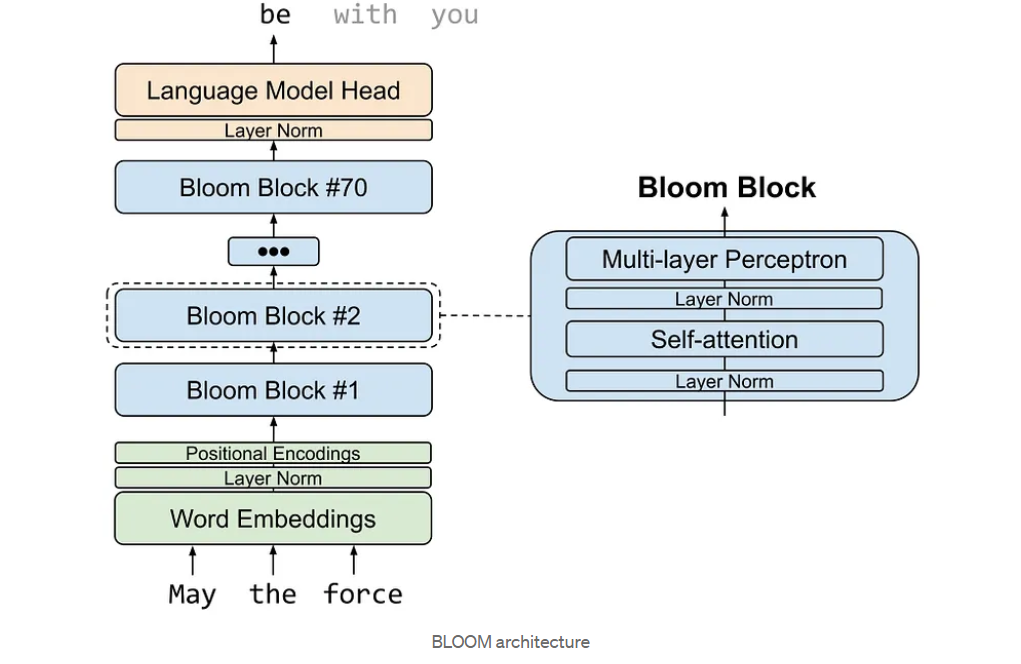



# **Uses of BLOOM**

BLOOM is a versatile tool designed to push the boundaries of language processing and generation. Its intended uses span across various domains, each leveraging its expansive language capabilities.

**Multilingual Content Generation**:

 With proficiency in 59 languages, BLOOM excels at creating diverse and inclusive content. This capability is particularly valuable in global communication, education, and media, where language inclusivity is crucial.

**Coding and Software Development:**

 BLOOM's training in programming languages positions it as an asset in software development. It can assist in tasks like code generation, debugging, and serving as an educational tool for new programmers.

**Research and Academia:**

 In academic circles, BLOOM serves as a powerful resource for linguistic analysis and AI research, providing insights into language patterns, AI behavior, and more.

# **Setup**


**Steps**
1. Go to RunTime and select Change Runtime from CPU to Available GPU
2.
Run the model and tokenizer in GPU else the code fails.

Initially I imported transformers and Pytorch .
PyTorch is a fully featured framework for building deep learning models.
PyTorch is distinctive for its excellent support for GPUs and its use of reverse-mode auto-differentiation, which enables computation graphs to be modified on the fly. This makes it a popular choice for fast experimentation and prototyping.

In [1]:
!pip install transformers -q

This is taken directly from Hugging face

In [2]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM, set_seed

In [3]:
import torch
torch.set_default_tensor_type(torch.cuda.FloatTensor)

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


CUDA stands for Compute Unified Device Architecture.

 It  is a proprietary parallel computing platform and application programming interface (API) that allows software to use certain types of graphics processing units (GPUs) for accelerated general-purpose processing

In [4]:
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

In [5]:
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")

config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
model.__class__

transformers.models.bloom.modeling_bloom.BloomForCausalLM

In [ ]:
model.__class__.__name__

'BloomForCausalLM'

In [ ]:
set_seed(11111)

In [ ]:
prompt = "What is colonization?"

In [ ]:
input_tokens = tokenizer(prompt, return_tensors="pt").to(0)

In [ ]:
input_tokens

{'input_ids': tensor([[10560,   632, 19350,  6926,    34]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [ ]:
result = model.generate(**input_tokens, max_length=200, top_k=0, temperature=0.5)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:537: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


In [ ]:
result[0]


tensor([ 10560,    632,  19350,   6926,     34, 241290,   6926,    632,    368,
          4451,    461,    267,   2298,  60240,    267,   7515,    461,    267,
          2084,  21200,     17,   3162,    632,    368,   4451,    461,    267,
          2298,  60240,    267,   7515,    461,    267,   2084,  21200,     17,
          3162,    632,    368,   4451,    461,    267,   2298,  60240,    267,
          7515,    461,    267,   2084,  21200,     17,   3162,    632,    368,
          4451,    461,    267,   2298,  60240,    267,   7515,    461,    267,
          2084,  21200,     17,   3162,    632,    368,   4451,    461,    267,
          2298,  60240,    267,   7515,    461,    267,   2084,  21200,     17,
          3162,    632,    368,   4451,    461,    267,   2298,  60240,    267,
          7515,    461,    267,   2084,  21200,     17,   3162,    632,    368,
          4451,    461,    267,   2298,  60240,    267,   7515,    461,    267,
          2084,  21200,     17,   3162, 

In [ ]:
print(tokenizer.decode(result[0],truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))

What is colonization? Colonization is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community. It is the process of a person becoming a member of a new community


These are some of the Languages it is capable of translation


1.   Arabic
2.   Assamese
3.   Bengali
4.   English
5.   Spanish
 and so on.






In [ ]:
while True:
    prompt = input("Enter sentence and language to be translated: ")
    if user_input.lower() in ["exit", "quit"]:
        break
    input_tokens = tokenizer(prompt, return_tensors="pt").to(0)
    result = model.generate(**input_tokens, max_length=200, top_k=0, temperature=0.5)
    print(tokenizer.decode(result[0],truncate_before_pattern=[r"\n\n^#", "^'''", "\n\n\n"]))